In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/topic-modeling-for-research-articles/sample_sub.csv
/kaggle/input/topic-modeling-for-research-articles/Train.csv
/kaggle/input/topic-modeling-for-research-articles/Test.csv
/kaggle/input/topic-modeling-for-research-articles/Tags.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [3]:
df=pd.read_csv("../input/topic-modeling-for-research-articles/Train.csv")
df

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,id,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
count,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,...,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000,14004.000000
mean,10022.906955,0.420166,0.202157,0.275350,0.270923,0.043345,0.042274,0.098258,0.040988,0.046058,...,0.040988,0.028420,0.044344,0.026135,0.068123,0.044202,0.037918,0.063767,0.038703,0.040417
std,5780.460616,0.493603,0.401623,0.446706,0.444452,0.203639,0.201220,0.297673,0.198270,0.209619,...,0.198270,0.166177,0.205867,0.159544,0.251967,0.205550,0.191004,0.244347,0.192894,0.196942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5026.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10034.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15047.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20006.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

id                                               int64
ABSTRACT                                        object
Computer Science                                 int64
Mathematics                                      int64
Physics                                          int64
Statistics                                       int64
Analysis of PDEs                                 int64
Applications                                     int64
Artificial Intelligence                          int64
Astrophysics of Galaxies                         int64
Computation and Language                         int64
Computer Vision and Pattern Recognition          int64
Cosmology and Nongalactic Astrophysics           int64
Data Structures and Algorithms                   int64
Differential Geometry                            int64
Earth and Planetary Astrophysics                 int64
Fluid Dynamics                                   int64
Information Theory                               int64
Instrument

# TEXT CLEANING-->

In [6]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [7]:
df['ABSTRACT']=df['ABSTRACT'].apply(clean_text)

In [8]:
df['ABSTRACT'][10]

'study problem etracting selective connector considering given set query vertices q subseteq v inside graph g v e selective connector subgraph g ehibits cohesiveness property contains query vertices necessarily connect relaing connectedness requirement allows connector detect multiple communities tolerant outliers achieve introducing new measure network inefficiency instantiating search considering selective connector problem finding minimum inefficiency subgraph show minimum inefficiency subgraph problem nphard devise efficient algorithms approimate means several case studies inside variety application domains human brain cancer food networks show minimum inefficiency subgraph produces highquality solutions ehibiting desired behaviors selective connector'

In [9]:
g=[]

In [10]:
for i in df['ABSTRACT']:
    g.append(i)

In [11]:
len(g)

14004

In [12]:
len(g[4])

992

In [13]:
# for i in g:
#     print(len(i))

In [14]:
# g

In [15]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 3583


# So this will be the maximum length of padding..

In [16]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['ABSTRACT'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 61054 unique tokens.


In [17]:
maxl

3583

# As the length maximum length of the sequence is much, we will be selecting maximum length as 3000.

In [18]:
X = tokenizer.texts_to_sequences(df['ABSTRACT'].values)
X = pad_sequences(X, maxlen=500)

In [19]:
X.shape

(14004, 500)

In [20]:
Y = df.loc[:, df.columns != 'ABSTRACT'].loc[:, df.loc[:, df.columns != 'ABSTRACT'].columns != 'id']


In [21]:
len(Y)

14004

In [22]:
df.head(3)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,evergrowing datasets inside observational astr...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,propose framework considering optimal tmatchin...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures open shell transition metal mol...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df.tail(3)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
14001,4842,despite usually considered two competing pheno...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,present framework implementation relying natur...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14003,1724,report smallangle neutron scattering sans meas...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

# MODEL-->

In [34]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3583))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(29, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3583, 100)         5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 3583, 100)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 29)                2929      
Total params: 5,083,329
Trainable params: 5,083,329
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X, Y, epochs=10, batch_size=64, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10


2021-11-14 13:12:53.942257: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


197/197 [==============================] - 385s 2s/step - loss: 9.0323 - accuracy: 0.4001 - val_loss: 9.2669 - val_accuracy: 0.4347
Epoch 2/10
197/197 [==============================] - 379s 2s/step - loss: 9.3173 - accuracy: 0.4186 - val_loss: 9.4655 - val_accuracy: 0.4347
Epoch 3/10
197/197 [==============================] - 377s 2s/step - loss: 9.5116 - accuracy: 0.4186 - val_loss: 9.7477 - val_accuracy: 0.4347
Epoch 4/10
197/197 [==============================] - 379s 2s/step - loss: 9.7544 - accuracy: 0.4186 - val_loss: 10.0887 - val_accuracy: 0.4347


In [29]:
df2 = pd.read_csv('/kaggle/input/topic-modeling-for-research-articles/Test.csv', delimiter=',')
X_test = tokenizer.texts_to_sequences(df2['ABSTRACT'].values)
X_test = pad_sequences(X_test, maxlen=500)
Y_test = df2.loc[:, df2.columns != 'ABSTRACT'].loc[:, df2.loc[:, df2.columns != 'ABSTRACT'].columns != 'id']

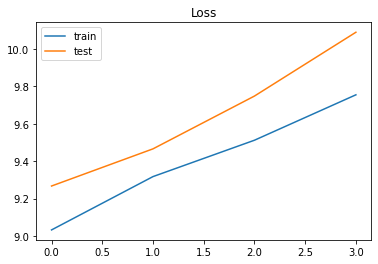

In [31]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

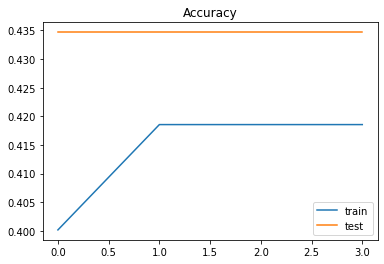

In [32]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [27]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3583))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(1024, dropout=0.2,return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(29, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3583, 100)         5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 3583, 100)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 3583, 1024)        4608000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               590336    
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 10,202,077
Trainable params: 10,202,077
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X, Y, epochs=10, batch_size=32,steps_per_epoch = 32, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
32/32 [==============================] - 167s 5s/step - loss: 8.3228 - accuracy: 0.4004 - val_loss: 8.7980 - val_accuracy: 0.4347
Epoch 2/10
32/32 [==============================] - 164s 5s/step - loss: 8.7936 - accuracy: 0.4150 - val_loss: 8.8274 - val_accuracy: 0.4347
Epoch 3/10
32/32 [==============================] - 165s 5s/step - loss: 8.6201 - accuracy: 0.4287 - val_loss: 8.8897 - val_accuracy: 0.4347
Epoch 4/10
32/32 [==============================] - 166s 5s/step - loss: 9.0280 - accuracy: 0.4131 - val_loss: 8.9801 - val_accuracy: 0.4347
